In [1]:
%matplotlib inline
import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt
np.core.arrayprint._line_width = 160
import seaborn as sns; sns.set()

In [2]:
from collections import namedtuple
DecompSVD = namedtuple('DecompSVD', 'Orig U Sigma V')
def MakeDecompSVD(matrix):
    U, sigma, V = np.linalg.svd(matrix)
    return DecompSVD(Orig=matrix, U=U, Sigma=sigma, V=V)

In [3]:
def randnMatrix(rows:int, cols:int):
    m = np.matrix(np.random.normal(0, 1, (rows, cols)))
    return m

In [4]:
def randnMatrixList(rows:int, cols:int, count:int):
    return [randnMatrix(rows=rows, cols=cols) for i in range(count)]

In [5]:
def randnPdefMatrix(rows:int, cols:int):
    mm = np.matrix(np.random.normal(0, 1, (rows, cols)))
    pdef = np.transpose(mm) * mm 
    return pdef

In [6]:
def randnPdefMatrixList(rows:int, cols:int, count:int):
    return [randnPdefMatrix(rows=rows, cols=cols) for i in range(count)]

In [7]:
matrixCount = 1000

### SVD Sigmas for random 16x16 matrix

In [8]:
randMatsSq16 = randnMatrixList(rows=16, cols=16, count=matrixCount)

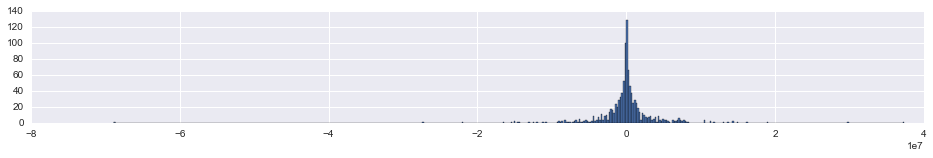

In [9]:
plt.figure(figsize=(16, 2))
plt.hist([LA.det(i) for i in randMatsSq16], 500)
plt.show()

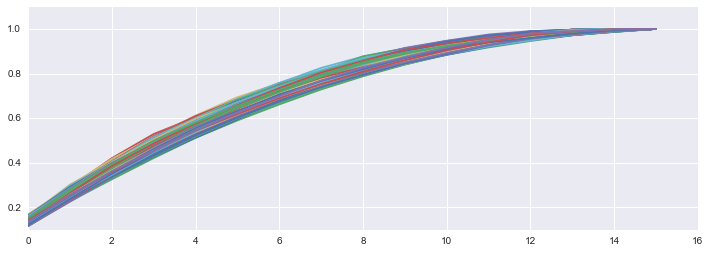

In [10]:
decomps16 = [MakeDecompSVD(m) for m in randMatsSq16]
plt.figure(figsize=(12, 4))
for svd in decomps16:
    plt.plot(np.cumsum(svd.Sigma) / np.sum(svd.Sigma))
plt.show()

### SVD sigmas for random 32x32 matrix

In [11]:
randMatsSq32 = randnMatrixList(rows=32, cols=32, count=matrixCount)
decomps32 = [MakeDecompSVD(m) for m in randMatsSq32]

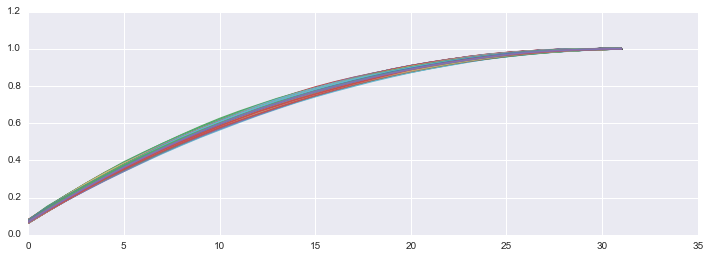

In [12]:
plt.figure(figsize=(12, 4))
for svd in decomps32:
    plt.plot(np.cumsum(svd.Sigma) / np.sum(svd.Sigma))
plt.show()

### Sigmas for some tall matricies

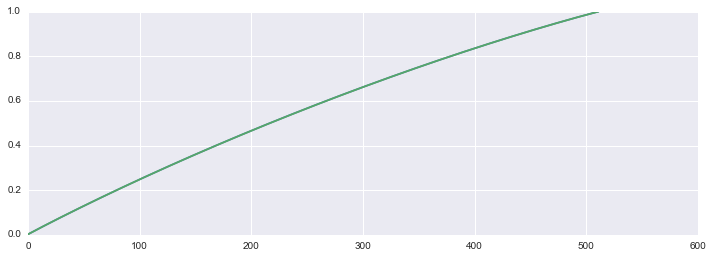

In [34]:
randMatsSq64 = randnMatrixList(rows=4096, cols=512, count=2)
decomps64 = [MakeDecompSVD(m) for m in randMatsSq64]
plt.figure(figsize=(12, 4))
for svd in decomps64:
    plt.plot(np.cumsum(svd.Sigma) / np.sum(svd.Sigma))
plt.show()

In [30]:
randMatsSq32t = randnMatrixList(rows=256, cols=32, count=matrixCount)
decomps32t = [MakeDecompSVD(m) for m in randMatsSq32t]

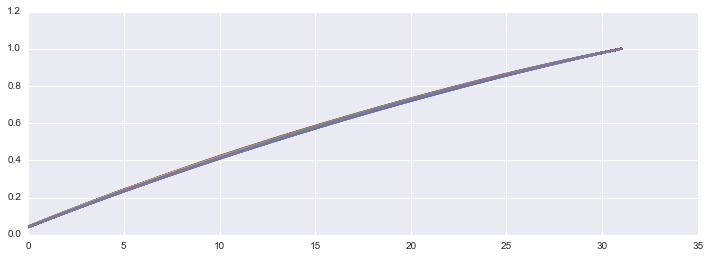

In [31]:
plt.figure(figsize=(12, 4))
for svd in decomps32t:
    plt.plot(np.cumsum(svd.Sigma) / np.sum(svd.Sigma))
plt.show()

### SVD sigmas for random positive definite 32x32 matrix

In [13]:
randMatsPdef32 = randnPdefMatrixList(rows=32, cols=32, count=matrixCount)
decompsPdef32 = [MakeDecompSVD(m) for m in randMatsPdef32]

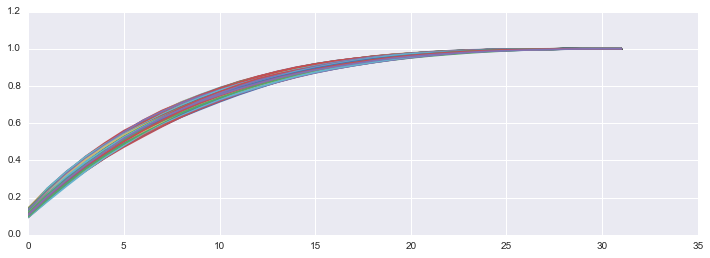

In [14]:
plt.figure(figsize=(12, 4))
for svd in decompsPdef32:
    plt.plot(np.cumsum(svd.Sigma) / np.sum(svd.Sigma))
plt.show()

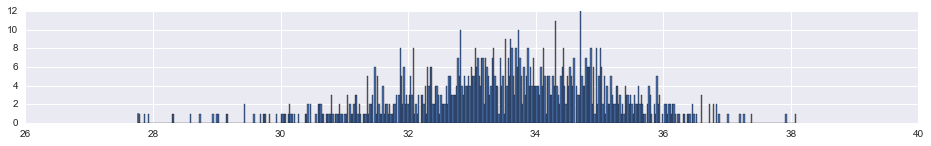

In [15]:
plt.figure(figsize=(16, 2))
detsPdef32 = [LA.det(i) for i in randMatsPdef32]
plt.hist(np.log10(detsPdef32), 500)
plt.show()

#### random junk

In [16]:
from sklearn.preprocessing import normalize
def MatrixNormL2(m):
    return normalize(m, axis=1, norm='l2') 

In [17]:
CompresSVD = namedtuple('CompresSVD', 'Orig U Sigma V Trunc, Compressed')
def compressSVD(d:DecompSVD, trunc:int):
    compressed = np.matrix(d.U[:, :trunc]) * np.diag(d.Sigma[:trunc]) * np.matrix(d.V[:trunc, :])
    return CompresSVD(Orig=d.Orig, U=d.U, Sigma=d.Sigma, V=d.V, Trunc=trunc, Compressed=compressed)  

In [18]:
CompresSVD_Diff = namedtuple('CompresSVD_Diff', 'Orig U Sigma V Trunc, Compressed, Diff')
def compresSVD_Diff(matrix, trunc:int):
    decomp = MakeDecompSVD(matrix)
    d = compressSVD(decomp, trunc)
    diff = d.Orig - d.Compressed
    return CompresSVD_Diff(Orig=d.Orig, U=d.U, Sigma=d.Sigma, V=d.V, Trunc=trunc, Compressed=d.Compressed, Diff=diff)  